In [1]:
from panda3d.core import *
from PIL import Image
import numpy as np

In [2]:
# loadPrcFileData("", "window-type offscreen")

In [3]:
from direct.showbase import ShowBase
base = ShowBase.ShowBase()

In [4]:
base.cam.setPos(100, 100, 100)
base.cam.lookAt(0, 0, 0)
base.setFrameRateMeter(True)

In [5]:
node = None

In [6]:
# teapot = loader.loadModel('teapot')
teapot = loader.loadModel('c/Data/Projects/phd/cdl/examples/rb1.bam')
teapot.reparentTo(render)
teapot.setPos(0, -20, 10)
teapot.setScale(1.)
teapotMovement = teapot.hprInterval(50, LPoint3(0, 360, 360))
teapotMovement.loop()

OSError: Could not load model file(s): ['c/Data/Projects/phd/cdl/examples/rb1.bam']

In [7]:
from panda3d.core import Point2, LPoint2i, Geom, GeomNode, GeomTriangles, GeomVertexFormat, GeomVertexData, GeomVertexWriter

vdata = GeomVertexData('chunk-vertex', GeomVertexFormat.getV3n3c4(), Geom.UHStatic)

vertex = GeomVertexWriter(vdata, 'vertex')
normal = GeomVertexWriter(vdata, 'normal')
color = GeomVertexWriter(vdata, 'color')

points = np.array([[-1, -1, 0], [1, -1, 0], [1, 1, 0], [-1, 1, 0]], dtype=np.float) * 50

for point in points:
    vertex.addData3f(*point)
    normal.addData3f(0., 0., 1.)
    color.addData4f(0, 1, 0, 0.5)

prim = GeomTriangles(Geom.UHStatic)
index = 0
prim.addVertices(index, index + 1, index + 2)
prim.addVertices(index, index + 2, index + 3)
prim.closePrimitive()

if node:
    node.removeGeom(geom)

node = GeomNode('chunk')
nodePath = base.render.attachNewNode(node)
nodePath.setPos(0., 0., 0.)
#nodePath.setShaderAuto()

geom = Geom(vdata)
geom.addPrimitive(prim)
node.addGeom(geom)

In [8]:
light = render.attachNewNode(Spotlight("Spot"))
light.node().setScene(render)
light.node().setShadowCaster(True)
light.node().showFrustum()
light.node().getLens().setFov(40)
light.node().getLens().setNearFar(10, 100)
render.setLight(light)

alight = render.attachNewNode(AmbientLight("Ambient"))
alight.node().setColor(LVector4(0.2, 0.2, 0.2, 1))
render.setLight(alight)

# Important! Enable the shader generator.
render.setShaderAuto()

light.setPos(0, -40, 25)
light.lookAt(0, -10, 0)
light.node().getLens().setNearFar(10, 100)

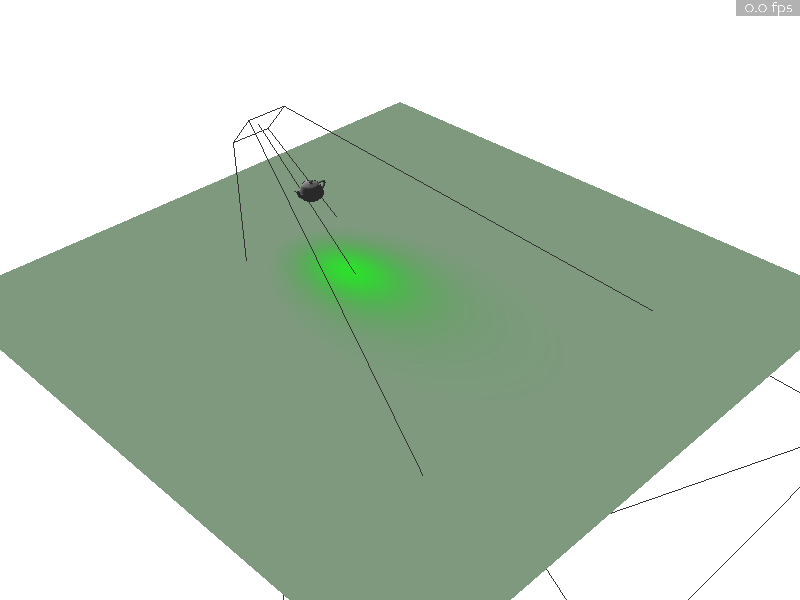

In [9]:
base.graphicsEngine.renderFrame()

FILENAME = 'tmp.png'
base.screenshot(FILENAME, defaultFilename=False)
im = Image.open(FILENAME)
im